In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import pyrosm
import folium
from folium import plugins
from folium.plugins import HeatMap
from datetime import datetime

In [5]:
#call the function new_clean_data from the file data_cleaning.py
from data_cleaning import new_clean_data


In [6]:
from weather import getCleanWeather

In [13]:
#read out a file from path

dx = pd.read_csv(r"C:\Users\yasin\OneDrive\Desktop\Weather_Boston\Weather_Boston")




PermissionError: [Errno 13] Permission denied: 'C:\\Users\\yasin\\OneDrive\\Desktop\\Weather_Boston\\Weather_Boston'

In [4]:
df = new_clean_data(r'C:\Users\yasin\OneDrive\Desktop\DDT_Daten\bluebikes_2017_2018')

NameError: name 'new_clean_data' is not defined

In [7]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081461 entries, 0 to 3081460
Data columns (total 6 columns):
 #   Column            Dtype         
---  ------            -----         
 0   start_time        datetime64[ns]
 1   end_time          datetime64[ns]
 2   start_station_id  int64         
 3   end_station_id    int64         
 4   bike_id           int64         
 5   weekday           int64         
dtypes: datetime64[ns](2), int64(4)
memory usage: 141.1 MB


In [8]:
dx.info()

NameError: name 'dx' is not defined

In [9]:
#analysis if the bikesharing is more popular on weekdays or weekends by using the attributes you can see on df.info()  
df['weekday'] = df['start_time'].dt.day_name()
df['weekday'].value_counts()


Wednesday    497100
Thursday     493646
Friday       472554
Tuesday      468367
Monday       445536
Saturday     361699
Sunday       342559
Name: weekday, dtype: int64

In [14]:
#analysis if the bikesharing is more popular in the morning or in the afternoon by using the attributes you can see on df.info() the hours sorted ascending
df['hour'] = df['start_time'].dt.hour
df['hour'].value_counts().sort_index()


0      24325
1      15744
2       9962
3       3808
4       4163
5      17718
6      61036
7     168914
8     292007
9     173864
10    128021
11    141036
12    165457
13    163903
14    162294
15    183045
16    266655
17    349988
18    256006
19    175989
20    121719
21     88140
22     65533
23     42134
Name: hour, dtype: int64

In [7]:
#analysing the most popular start stations
df['start_station_id'].value_counts().head(10)

67     96165
80     66090
22     64188
68     63759
189    52368
178    48919
74     48105
190    47082
36     44610
53     44564
Name: start_station_id, dtype: int64

In [1]:
#plot these popular start stations on a map
df['start_station_name'].value_counts().head(10).plot(kind='barh', figsize=(10,5), color='green', fontsize=13)
plt.title('Most Popular Start Stations', fontsize=16)
plt.xlabel('Number of Trips', fontsize=14)
plt.ylabel('Station Name', fontsize=14)
plt.show()

NameError: name 'df' is not defined

In [13]:
#analysing the most popular end stations
df['end_station_id'].value_counts().head(10)


67     92077
80     79886
190    63711
68     63500
22     60875
74     50044
189    49335
36     48588
178    45537
107    42470
Name: end_station_id, dtype: int64

In [14]:
#illustrate those start stations on a map
import folium
from folium.plugins import HeatMap

In [15]:
#illustrate those start stations on a map
#first we need to create a map
map = folium.Map(location=[42.3601, -71.0589], zoom_start=12)


In [15]:
#illustrate those start stations on a map
stationArr = df[['start_station_latitude', 'start_station_longitude']].as_matrix()


HeatMap(stationArr).add_to(map)

map.save('Heatmap.html')
map



KeyError: "None of [Index(['start_station_latitude', 'start_station_longitude'], dtype='object')] are in the [columns]"

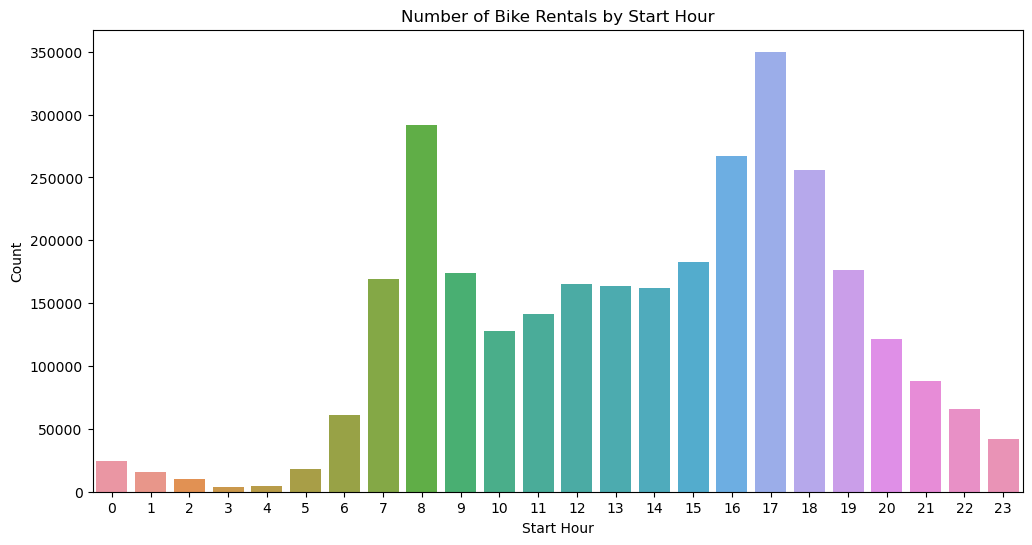

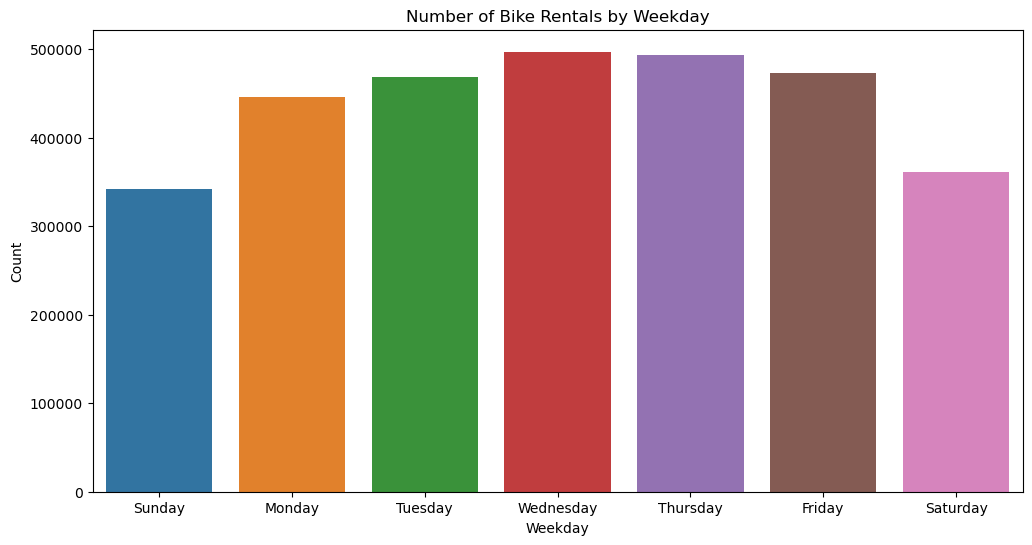

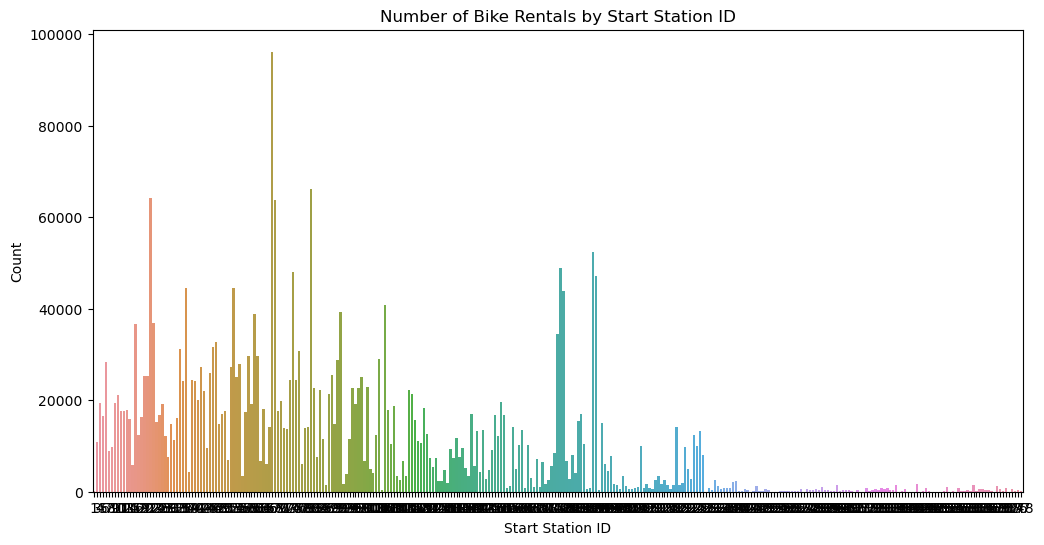

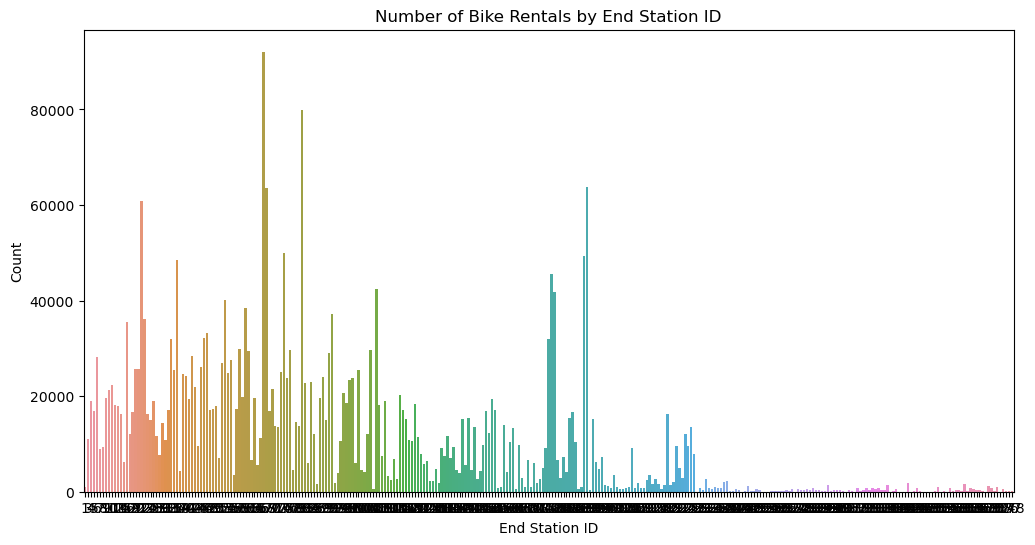

In [16]:
#Usage Patterns: Examine the frequency and distribution of bike rentals based on attributes like start time,
#end time, weekday, and station IDs. This analysis can provide insights into peak hours, popular stations,
#and overall usage trends.



# Convert start_time and end_time columns to datetime objects
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

# Extract additional attributes from start_time and end_time
df['start_hour'] = df['start_time'].dt.hour
df['end_hour'] = df['end_time'].dt.hour

# Plot the number of bike rentals by start hour
plt.figure(figsize=(12, 6))
sns.countplot(x='start_hour', data=df)
plt.title('Number of Bike Rentals by Start Hour')
plt.xlabel('Start Hour')
plt.ylabel('Count')
plt.show()

# Plot the number of bike rentals by weekday
plt.figure(figsize=(12, 6))
sns.countplot(x='weekday', data=df)
plt.title('Number of Bike Rentals by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.show()

# Plot the number of bike rentals by start station ID
plt.figure(figsize=(12, 6))
sns.countplot(x='start_station_id', data=df)
plt.title('Number of Bike Rentals by Start Station ID')
plt.xlabel('Start Station ID')
plt.ylabel('Count')
plt.show()

# Plot the number of bike rentals by end station ID
plt.figure(figsize=(12, 6))
sns.countplot(x='end_station_id', data=df)
plt.title('Number of Bike Rentals by End Station ID')
plt.xlabel('End Station ID')
plt.ylabel('Count')
plt.show()


In [19]:
#Duration of Rentals: Calculate the average duration of bike rentals to understand how long users typically use the bikes.
#Analyze the distribution of rental durations to identify any patterns or outliers.


# Convert start_time and end_time columns to datetime objects
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

# Calculate the duration of bike rentals in minutes
df['duration_minutes'] = (df['end_time'] - df['start_time']).dt.total_seconds() / 60

# Calculate the average duration of bike rentals
average_duration = np.mean(df['duration_minutes'])
print(f'Average duration of bike rentals: {average_duration:.2f} minutes')

Average duration of bike rentals: 23.29 minutes


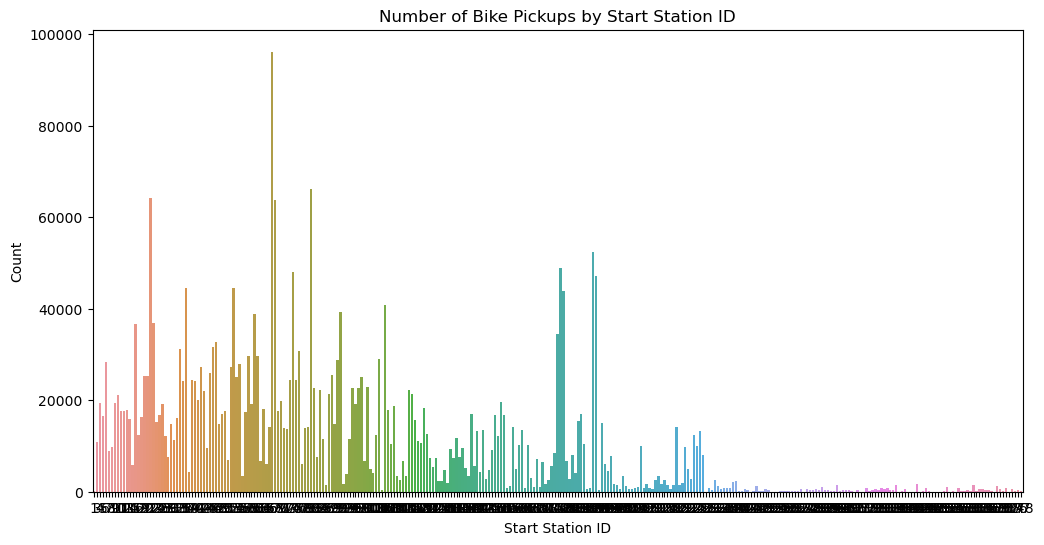

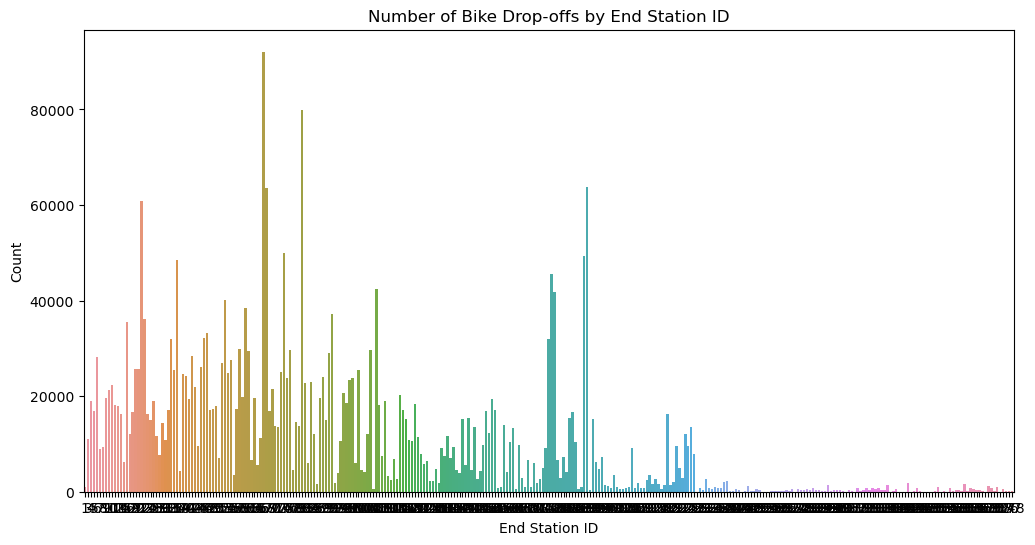

In [20]:
#Station Utilization: Evaluate the usage of individual stations by analyzing the number of bike pickups and drop-offs at each station. 
#This information can help identify stations that are consistently in high demand or stations that may require more bikes.



# Plot the number of bike pickups by start station ID
plt.figure(figsize=(12, 6))
sns.countplot(x='start_station_id', data=df)
plt.title('Number of Bike Pickups by Start Station ID')
plt.xlabel('Start Station ID')
plt.ylabel('Count')
plt.show()

# Plot the number of bike drop-offs by end station ID
plt.figure(figsize=(12, 6))
sns.countplot(x='end_station_id', data=df)
plt.title('Number of Bike Drop-offs by End Station ID')
plt.xlabel('End Station ID')
plt.ylabel('Count')
plt.show()

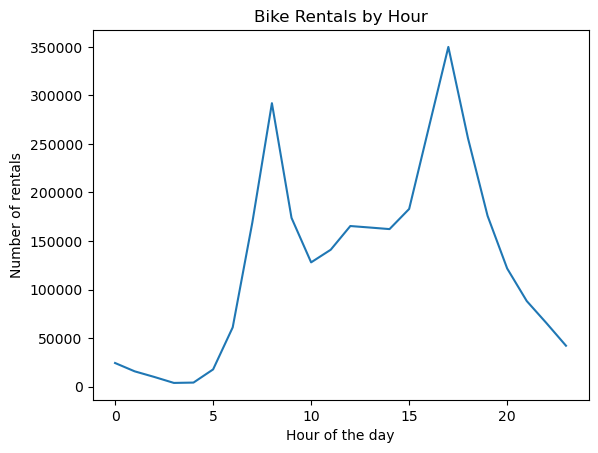

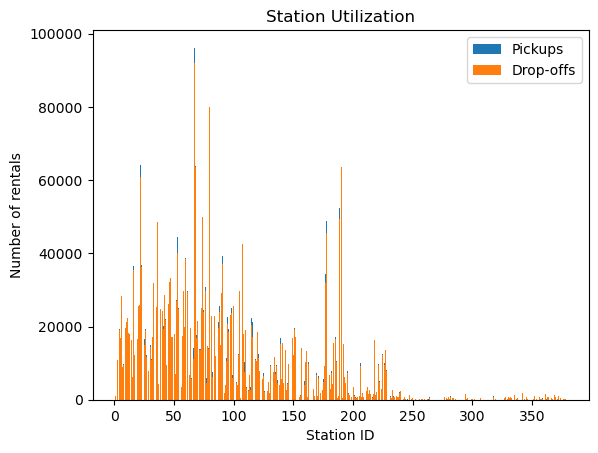

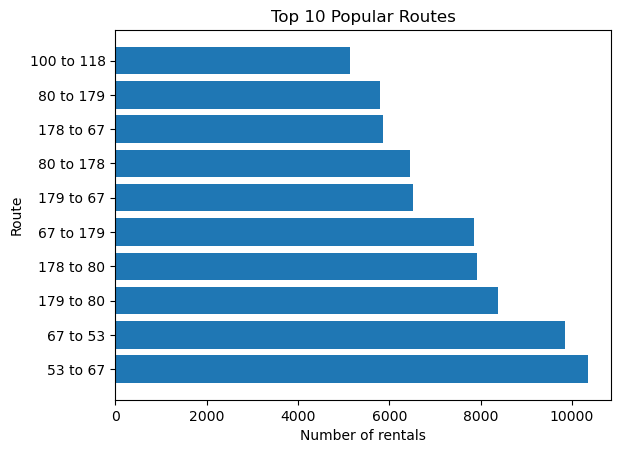

In [24]:

#This analysis can provide insights into the system's popularity among different user groups.



df['start_time'] = pd.to_datetime(df['start_time'])
df['hour'] = df['start_time'].dt.hour
rentals_by_hour = df['hour'].value_counts().sort_index()

# Plotting usage patterns
plt.plot(rentals_by_hour.index, rentals_by_hour.values)
plt.xlabel('Hour of the day')
plt.ylabel('Number of rentals')
plt.title('Bike Rentals by Hour')
plt.show()

# Station Utilization: Analyzing pickups and drop-offs by station ID
pickups_by_station = df['start_station_id'].value_counts()
dropoffs_by_station = df['end_station_id'].value_counts()

# Plotting station utilization
plt.bar(pickups_by_station.index, pickups_by_station.values, label='Pickups')
plt.bar(dropoffs_by_station.index, dropoffs_by_station.values, label='Drop-offs')
plt.xlabel('Station ID')
plt.ylabel('Number of rentals')
plt.title('Station Utilization')
plt.legend()
plt.show()



# Popular Routes: Analyzing start and end station combinations
route_counts = df.groupby(['start_station_id', 'end_station_id']).size().reset_index(name='count')
top_routes = route_counts.nlargest(10, 'count')

# Plotting popular routes
plt.barh(range(len(top_routes)), top_routes['count'])
plt.yticks(range(len(top_routes)), [f'{start} to {end}' for start, end in zip(top_routes['start_station_id'], top_routes['end_station_id'])])
plt.xlabel('Number of rentals')
plt.ylabel('Route')
plt.title('Top 10 Popular Routes')
plt.show()

In [25]:
#Popular Routes: Identify the most common routes taken by riders by analyzing the start and end station IDs.
#This information can help optimize bike distribution and station placement to cater to popular routes.



# Calculate the count of trips for each route (start_station_id to end_station_id)
route_counts = df.groupby(['start_station_id', 'end_station_id']).size().reset_index(name='trip_count')

# Sort the routes based on trip count in descending order
popular_routes = route_counts.sort_values('trip_count', ascending=False)

# Print the top 10 popular routes
print(popular_routes.head(10))

       start_station_id  end_station_id  trip_count
10354                53              67       10344
13191                67              53        9854
31583               179              80        8388
31369               178              80        7919
13302                67             179        7845
31570               179              67        6520
16261                80             178        6462
31356               178              67        5870
16262                80             179        5806
20032               100             118        5135


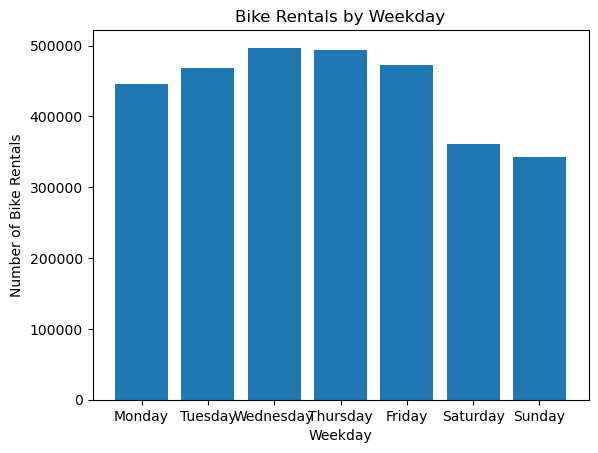

In [27]:
#Day of the Week Analysis: Examine the usage patterns based on weekdays to understand if there are any variations in bike-sharing demand throughout the week.
#This analysis can help in resource allocation and scheduling maintenance activities


# Convert the 'start_time' column to datetime format
df['start_time'] = pd.to_datetime(df['start_time'])

# Extract the weekday from the 'start_time' column
df['weekday'] = df['start_time'].dt.weekday

# Count the number of bike rentals for each weekday
rentals_by_weekday = df['weekday'].value_counts().sort_index()

# Plot the distribution of bike rentals by weekday
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.bar(weekday_labels, rentals_by_weekday)
plt.xlabel('Weekday')
plt.ylabel('Number of Bike Rentals')
plt.title('Bike Rentals by Weekday')
plt.show()

Average Bike Turnover Rate: 731.7646639753028


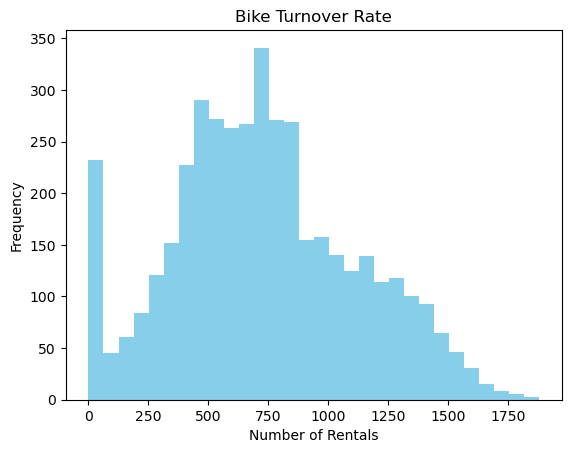

In [29]:
#Bike Turnover Rate: Calculate the average number of times each bike is rented within a specific period.
#This metric can help evaluate the system's efficiency in terms of bike availability and utilization.


# Calculate the number of times each bike is rented
bike_counts = df['bike_id'].value_counts()

# Calculate the average turnover rate
average_turnover = np.mean(bike_counts)

# Display the average turnover rate
print("Average Bike Turnover Rate:", average_turnover)

# Visualize the bike turnover rate
plt.hist(bike_counts, bins=30, color='skyblue')
plt.xlabel('Number of Rentals')
plt.ylabel('Frequency')
plt.title('Bike Turnover Rate')
plt.show()
